# <div style="text-align: center;">Exploratory Data Analysis on Terrorism</div>


![Example Image](https://editor.analyticsvidhya.com/uploads/96670ti1.jpg)


### Terrorism remains a significant challenge worldwide, affecting countless lives and societies. The primary objective of this Exploratory Data Analysis project is to delve into the complex landscape of terrorism using real-world data. By analyzing a comprehensive dataset containing information about terrorist incidents, this project seeks to identify meaningful patterns, geographical hotspots, attack methods, and potential factors contributing to these incidents. This project serves as a crucial stepping stone toward a comprehensive analysis of global terrorism. The insights gained from this exploratory phase can inform further investigations and policy decisions aimed at countering terrorism and its underlying causes. By visualizing trends and patterns, stakeholders can better allocate resources and develop strategies to address this critical global challenge.

## Importing Libraries and Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin-1')

C:\Users\hp\AppData\Local\Temp\ipykernel_792\2512250581.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin-1')


## Exploring Dataset

In [3]:
data.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
data.shape

(181691, 135)

In [6]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
data.loc[:,"crit1"]

0         1
1         1
2         1
3         1
4         1
         ..
181686    1
181687    1
181688    1
181689    1
181690    1
Name: crit1, Length: 181691, dtype: int64

In [8]:
for i in data.columns:
    print(i, end=' ,')

eventid ,iyear ,imonth ,iday ,approxdate ,extended ,resolution ,country ,country_txt ,region ,region_txt ,provstate ,city ,latitude ,longitude ,specificity ,vicinity ,location ,summary ,crit1 ,crit2 ,crit3 ,doubtterr ,alternative ,alternative_txt ,multiple ,success ,suicide ,attacktype1 ,attacktype1_txt ,attacktype2 ,attacktype2_txt ,attacktype3 ,attacktype3_txt ,targtype1 ,targtype1_txt ,targsubtype1 ,targsubtype1_txt ,corp1 ,target1 ,natlty1 ,natlty1_txt ,targtype2 ,targtype2_txt ,targsubtype2 ,targsubtype2_txt ,corp2 ,target2 ,natlty2 ,natlty2_txt ,targtype3 ,targtype3_txt ,targsubtype3 ,targsubtype3_txt ,corp3 ,target3 ,natlty3 ,natlty3_txt ,gname ,gsubname ,gname2 ,gsubname2 ,gname3 ,gsubname3 ,motive ,guncertain1 ,guncertain2 ,guncertain3 ,individual ,nperps ,nperpcap ,claimed ,claimmode ,claimmode_txt ,claim2 ,claimmode2 ,claimmode2_txt ,claim3 ,claimmode3 ,claimmode3_txt ,compclaim ,weaptype1 ,weaptype1_txt ,weapsubtype1 ,weapsubtype1_txt ,weaptype2 ,weaptype2_txt ,weapsubtype2

## Data Cleaning

In [9]:
data = data[['iyear', 'imonth','iday','country','country_txt','latitude','longitude','summary','attacktype1_txt','targtype1_txt',
            'region_txt','provstate','city','location','gname','motive','weaptype1_txt','nkill','nwound','addnotes']]

In [10]:
data.head()

iyear  imonth  iday  country         country_txt   latitude   longitude  \
0   1970       7     2       58  Dominican Republic  18.456792  -69.951164   
1   1970       0     0      130              Mexico  19.371887  -99.086624   
2   1970       1     0      160         Philippines  15.478598  120.599741   
3   1970       1     0       78              Greece  37.997490   23.762728   
4   1970       1     0      101               Japan  33.580412  130.396361   

  summary                 attacktype1_txt                targtype1_txt  \
0     NaN                   Assassination  Private Citizens & Property   
1     NaN     Hostage Taking (Kidnapping)      Government (Diplomatic)   
2     NaN                   Assassination          Journalists & Media   
3     NaN               Bombing/Explosion      Government (Diplomatic)   
4     NaN  Facility/Infrastructure Attack      Government (Diplomatic)   

                    region_txt provstate           city location  \
0  Central America & Caribbean       NaN  Santo Domingo      NaN   
1                North America   Federal    Mexico city      NaN   
2               Southeast Asia    Tarlac        Unknown      NaN   
3               Western Europe    Attica         Athens      NaN   
4                    East Asia   Fukouka        Fukouka      NaN   

                                gname motive weaptype1_txt  nkill  nwound  \
0                              MANO-D    NaN       Unknown    1.0     0.0   
1  23rd of September Communist League    NaN       Unknown    0.0     0.0   
2                             Unknown    NaN       Unknown    1.0     0.0   
3                             Unknown    NaN    Explosives    NaN     NaN   
4                             Unknown    NaN    Incendiary    NaN     NaN   

  addnotes  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country          181691 non-null  int64  
 4   country_txt      181691 non-null  object 
 5   latitude         177135 non-null  float64
 6   longitude        177134 non-null  float64
 7   summary          115562 non-null  object 
 8   attacktype1_txt  181691 non-null  object 
 9   targtype1_txt    181691 non-null  object 
 10  region_txt       181691 non-null  object 
 11  provstate        181270 non-null  object 
 12  city             181257 non-null  object 
 13  location         55495 non-null   object 
 14  gname            181691 non-null  object 
 15  motive           50561 non-null   object 
 16  weaptype1_txt    181691 non-null  obje

In [12]:
data.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country                 0
country_txt             0
latitude             4556
longitude            4557
summary             66129
attacktype1_txt         0
targtype1_txt           0
region_txt              0
provstate             421
city                  434
location           126196
gname                   0
motive             131130
weaptype1_txt           0
nkill               10313
nwound              16311
addnotes           153402
dtype: int64

In [13]:
data = data.dropna()
data.isnull().sum()

iyear              0
imonth             0
iday               0
country            0
country_txt        0
latitude           0
longitude          0
summary            0
attacktype1_txt    0
targtype1_txt      0
region_txt         0
provstate          0
city               0
location           0
gname              0
motive             0
weaptype1_txt      0
nkill              0
nwound             0
addnotes           0
dtype: int64

In [14]:
data.shape

(6765, 20)

In [15]:
data.mode()['nkill']

0    0.0
1    NaN
Name: nkill, dtype: float64

In [16]:
data['nkill'] = data['nkill'].fillna(0)

In [17]:
data.mode()['nwound']

0    0.0
1    NaN
Name: nwound, dtype: float64

In [18]:
data['nwound'] = data['nwound'].fillna(0)

In [19]:
data['casuality'] = data['nkill'] + data['nwound']

In [20]:
data.describe()

iyear       imonth         iday      country     latitude  \
count  6765.000000  6765.000000  6765.000000  6765.000000  6765.000000   
mean   2006.153141     6.529933    15.260902   123.223651    26.280094   
std       9.685117     3.297921     8.815697   108.583143    14.458481   
min    1970.000000     1.000000     0.000000     4.000000   -38.951872   
25%    2004.000000     4.000000     8.000000    45.000000    14.184076   
50%    2009.000000     6.000000    15.000000    95.000000    32.726602   
75%    2011.000000     9.000000    23.000000   167.000000    35.039240   
max    2017.000000    12.000000    31.000000  1004.000000    60.454957   

         longitude        nkill       nwound    casuality  
count  6765.000000  6765.000000  6765.000000  6765.000000  
mean     29.373911     3.396452     7.209017    10.605469  
std      62.130991     9.305660    24.448845    30.976385  
min    -124.163673     0.000000     0.000000     0.000000  
25%       3.679096     0.000000     0.000000     0.000000  
50%      44.371773     1.000000     1.000000     2.000000  
75%      72.060380     3.000000     5.000000     9.000000  
max     179.366667   230.000000  1001.000000  1161.000000

In [21]:
data.loc[:,'iyear'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

## Visualisations

### Country with Highest Number Of Terrorist Attacks

In [22]:
attack_value_counts = data.country_txt.value_counts(ascending=False)
total_attacks_in_country = pd.DataFrame({'Country': attack_value_counts.index, 'total_attacks': attack_value_counts.values})

In [23]:
total_attacks_in_country

Country  total_attacks
0             Iraq           1122
1            India            757
2    United States            615
3         Pakistan            605
4         Colombia            552
..             ...            ...
118          Malta              1
119  International              1
120      St. Lucia              1
121         Zambia              1
122        Bahrain              1

[123 rows x 2 columns]

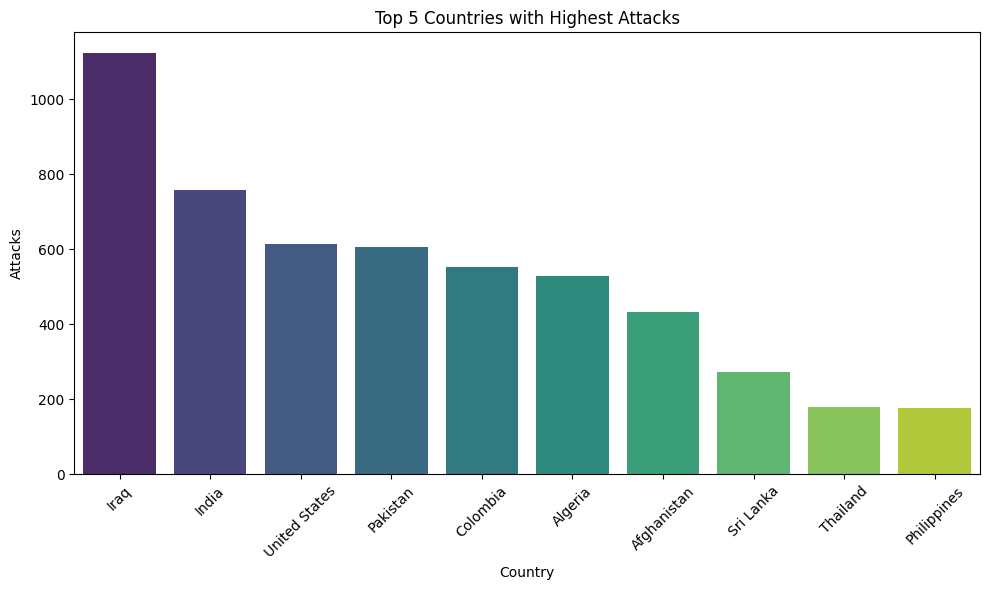

In [24]:
top_countries = total_attacks_in_country.sort_values(by='total_attacks', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='total_attacks', data=top_countries, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Attacks')
plt.title('Top 5 Countries with Highest Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Year With Most Terrorist Attacks

In [25]:
attacks_by_year= data.iyear.value_counts(ascending = False)
total_attacks_in_year = pd.DataFrame({'Year': attacks_by_year.index, 'total_attacks': attacks_by_year.values})
total_attacks_in_year.head(5)

Year  total_attacks
0  2010            787
1  2011            720
2  2009            589
3  2008            419
4  2007            412

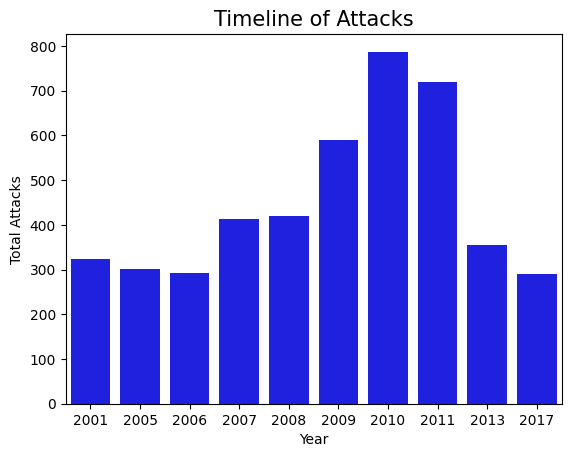

In [26]:
t = total_attacks_in_year.sort_values(by='total_attacks', ascending = False).head(10)  #.plot(kind='bar', color ='black', figsize=(15,6), fontsize=13)
sns.barplot(x='Year', y='total_attacks', data=t, color = 'blue')
plt.title('Timeline of Attacks', fontsize= 15)
plt.xlabel('Year')
plt.ylabel('Total Attacks')
plt.show()

### Density of Terrorist Attacks

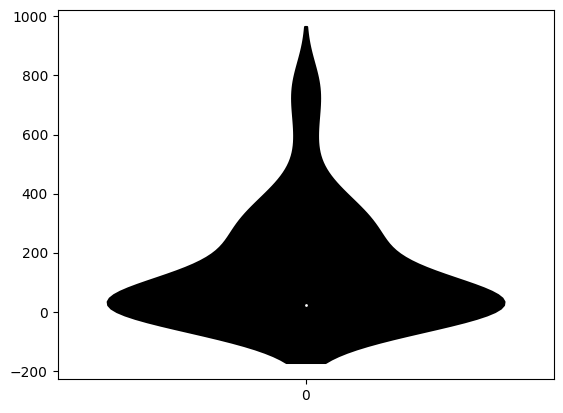

In [27]:
sns.violinplot(total_attacks_in_year['total_attacks'], orient='vertical', color='black');

### Most Attacked Cities by Terrorist

In [28]:
attack_value_counts = data.city.value_counts(ascending=False)
total_attacks_in_city = pd.DataFrame({'City': attack_value_counts.index, 'total_attacks': attack_value_counts.values})
total_attacks_in_city

City  total_attacks
0              Baghdad            560
1              Unknown            141
2              Karachi            133
3        New York City            104
4                Kabul             76
...                ...            ...
2974     Beni Boussaid              1
2975       Los Altares              1
2976           Bukardi              1
2977  Nad Ali district              1
2978         Lethapora              1

[2979 rows x 2 columns]

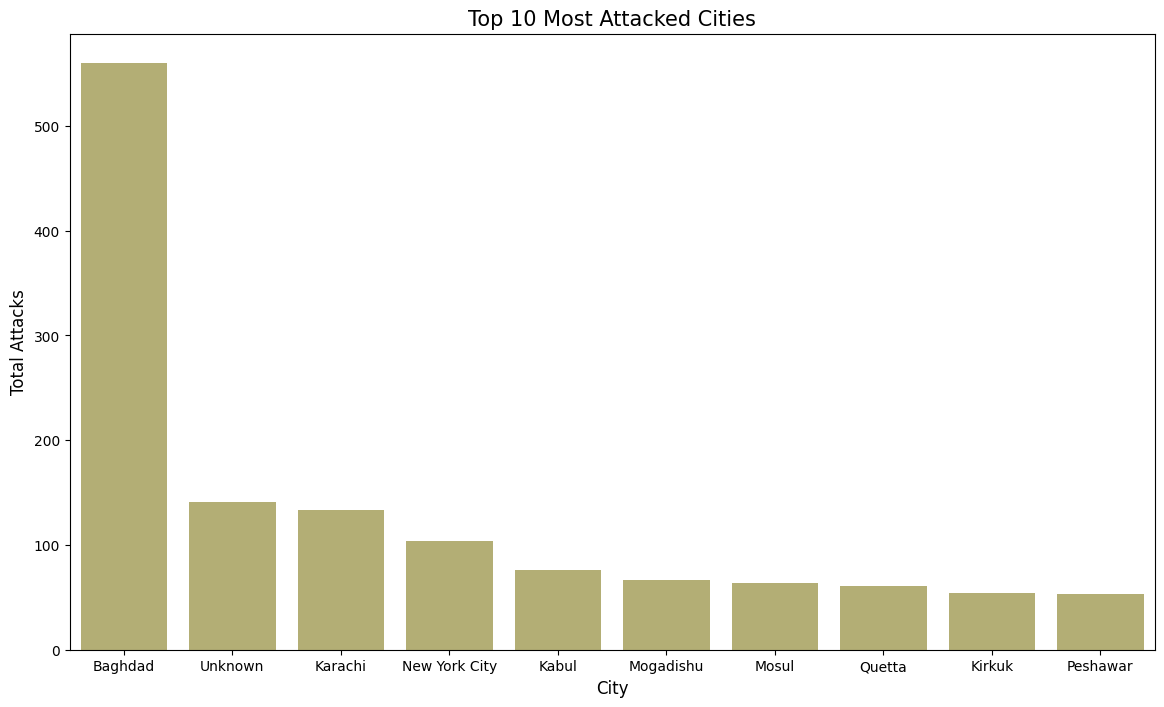

In [29]:
most_attacked_cities = total_attacks_in_city.sort_values(by='total_attacks', ascending = False).head(10)
plt.figure(figsize=(14,8))
sns.barplot(x='City', y= 'total_attacks', data=most_attacked_cities, color = 'darkkhaki')
plt.title('Top 10 Most Attacked Cities', fontsize= 15)
plt.xlabel('City', fontsize = 12)
plt.ylabel('Total Attacks', fontsize = 12)
plt.show()

### Most Prone Geographic location of Terrorist Attacks

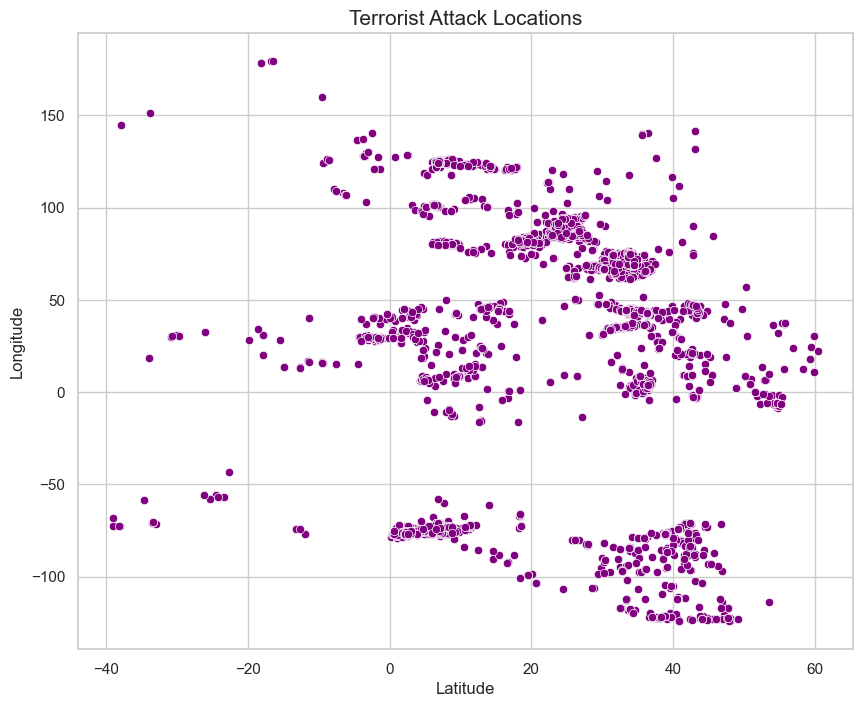

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.scatterplot(x='latitude', y='longitude', data=data, alpha=1, color = 'purple')
plt.title('Terrorist Attack Locations', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

### Weapons Causing Most Casualities

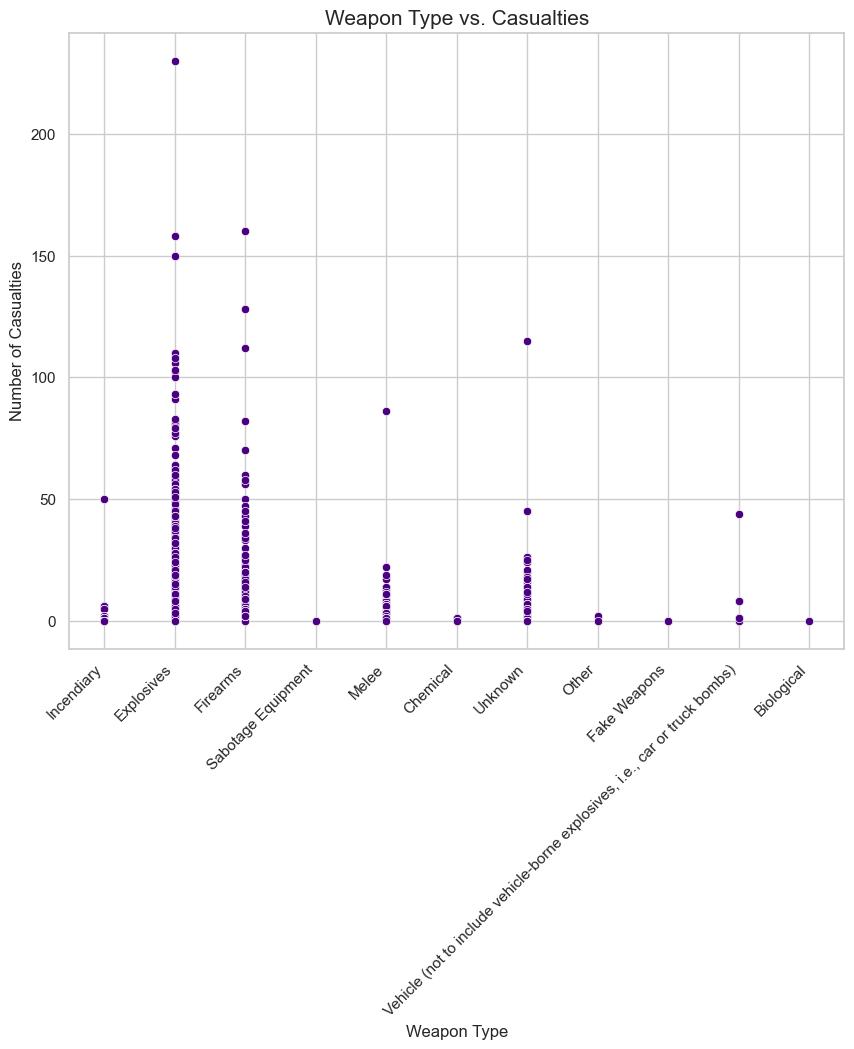

In [43]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='weaptype1_txt', y='nkill', data=data, color = 'indigo')
plt.title('Weapon Type vs. Casualties', fontsize = 15)
plt.xlabel('Weapon Type')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45, ha='right')
plt.show()

### Most Used Weapons

In [32]:
weapon = data.weaptype1_txt.value_counts()
weapon_used = pd.DataFrame({'Weapons': weapon.index, 'Times_Used': weapon.values})
weapon_used

Weapons  Times_Used
0                                          Explosives        3943
1                                            Firearms        1784
2                                          Incendiary         451
3                                             Unknown         360
4                                               Melee         169
5                                  Sabotage Equipment          17
6   Vehicle (not to include vehicle-borne explosiv...          15
7                                            Chemical          14
8                                               Other           8
9                                        Fake Weapons           3
10                                         Biological           1

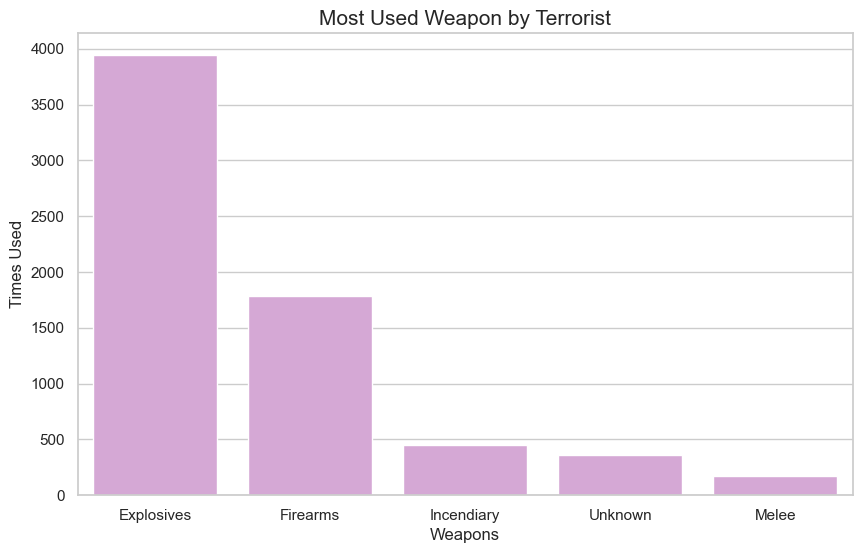

In [33]:
most_used_weapon = weapon_used.sort_values(by = 'Times_Used', ascending = False ).head(5)
plt.figure(figsize=(10,6))
sns.barplot(x='Weapons', y='Times_Used', data=most_used_weapon, color = 'plum');
plt.title('Most Used Weapon by Terrorist', fontsize = 15)
plt.ylabel('Times Used');


### Terrorist Groups with Most Attacks

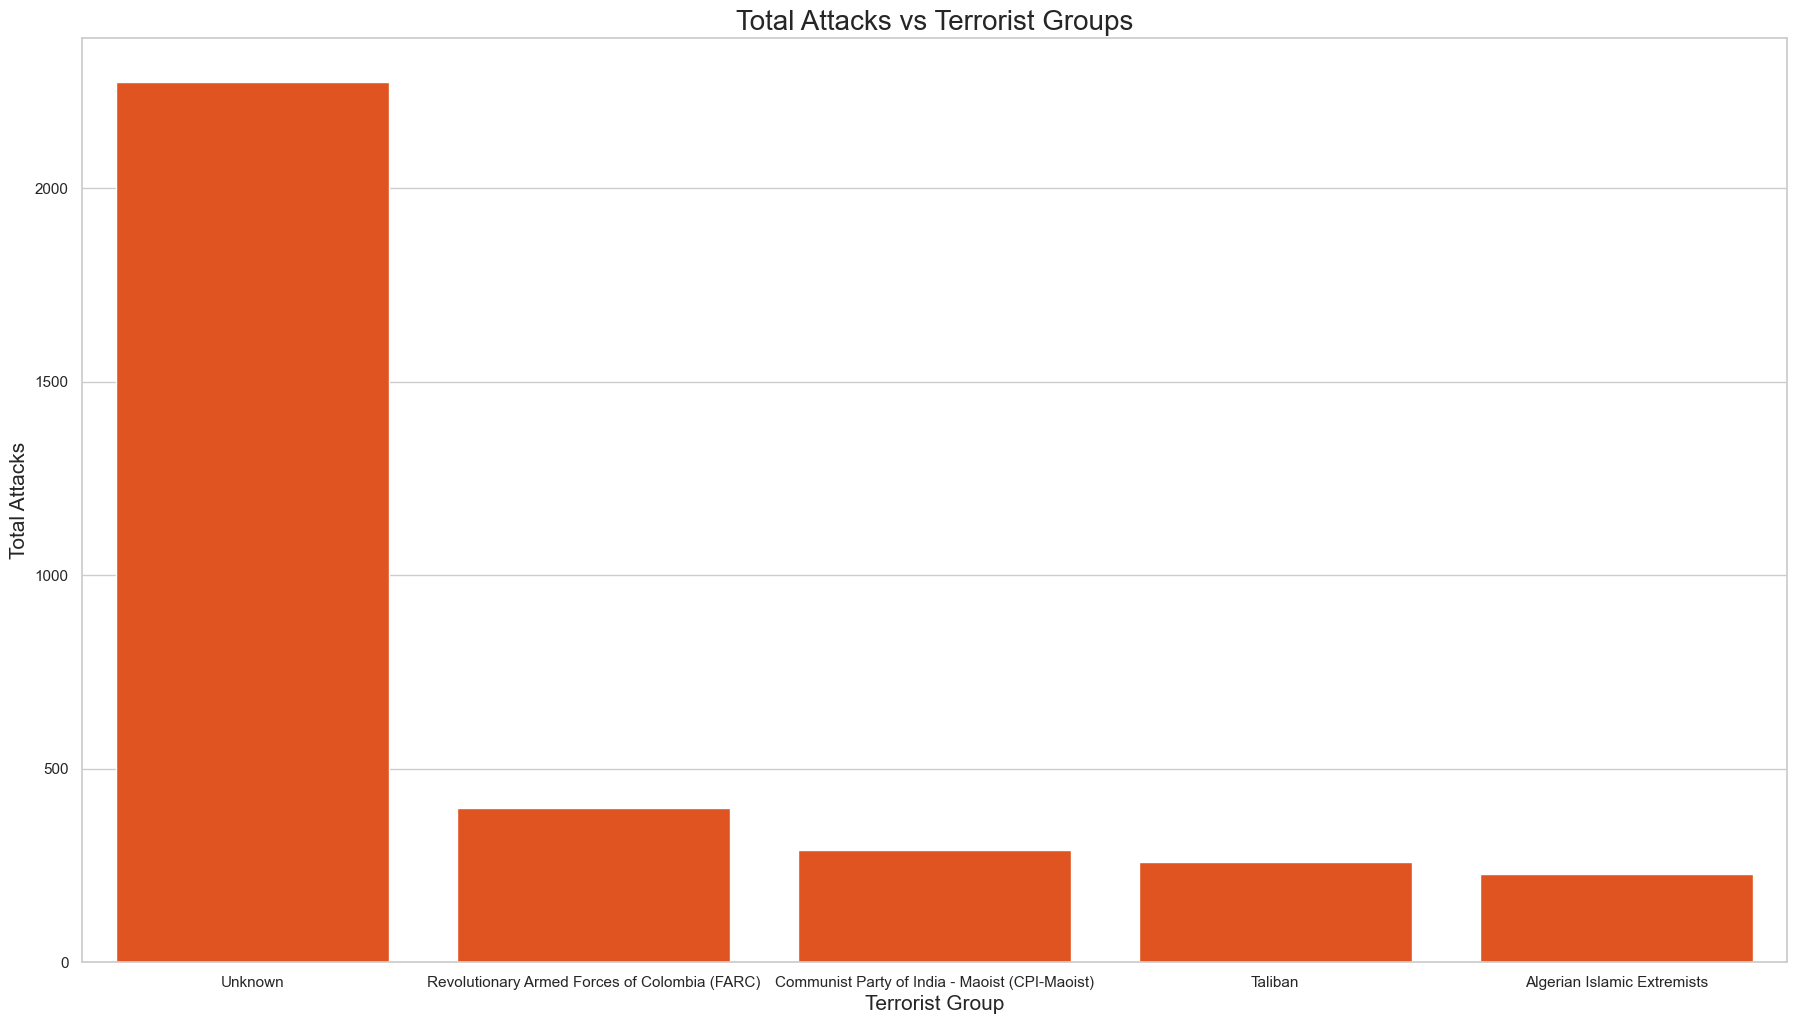

In [34]:
terrorist_org=data.gname.value_counts()
terrorist_responsible = pd.DataFrame({'Terrorist Groups' : terrorist_org.index, 'Total Attacks' : terrorist_org.values})
top_5_terrorist = terrorist_responsible.sort_values(by = 'Total Attacks', ascending = False).head(5)
plt.figure(figsize=(22,12))
sns.barplot(x='Terrorist Groups', y='Total Attacks', data = top_5_terrorist, color = 'orangered');
plt.xlabel('Terrorist Group', fontsize = 15);
plt.ylabel('Total Attacks', fontsize = 15);
plt.title('Total Attacks vs Terrorist Groups', fontsize = 20);

### Terrorist Groups Responsible for Attacks in IRAQ

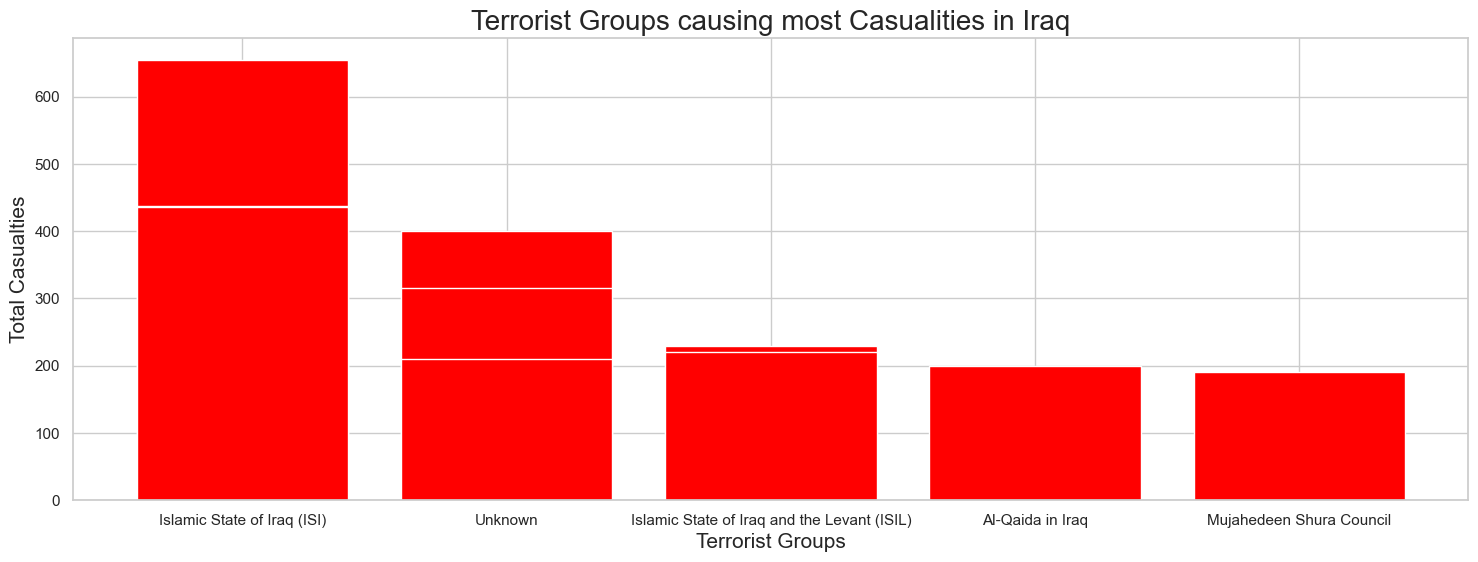

In [44]:
iraq_data = data[data['country_txt'] == 'Iraq']
most_terror_org = iraq_data.groupby('casuality')['gname'].sum().reset_index()
most_terror_org = most_terror_org.sort_values(by='casuality', ascending=False)
top_org = most_terror_org.head(10)


plt.figure(figsize=(18, 6))
plt.bar(top_org['gname'], top_org['casuality'], color='red');
plt.xlabel('Terrorist Groups', fontsize = 15)
plt.ylabel('Total Casualties', fontsize = 15)
plt.title('Terrorist Groups causing most Casualities in Iraq', fontsize = 20)
plt.show()


### Terrorist Groups Responsible for Attacks in INDIA

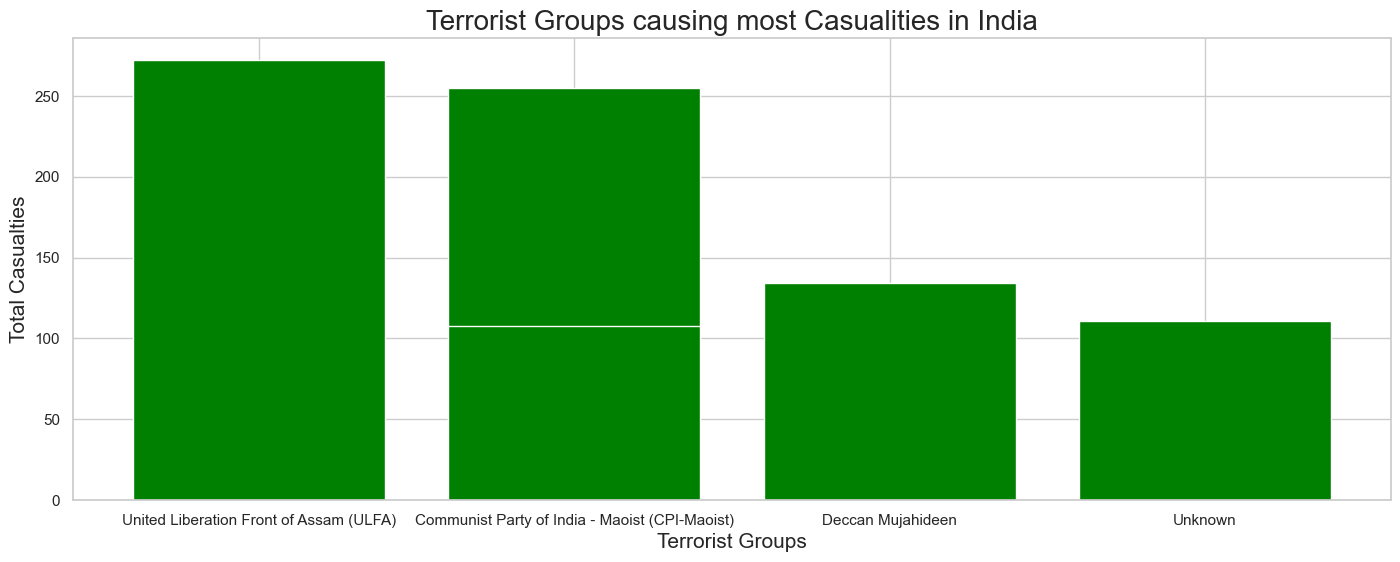

In [36]:
india_data = data[data['country_txt'] == 'India']
most_terror_org_india = india_data.groupby('casuality')['gname'].sum().reset_index()
most_terror_org_india = most_terror_org_india.sort_values(by='casuality', ascending=False)
top_org_india = most_terror_org_india.head(5)

plt.figure(figsize=(17, 6))
plt.bar(top_org_india['gname'], top_org_india['casuality'], color='green')
plt.xlabel('Terrorist Groups', fontsize = 15)
plt.ylabel('Total Casualties', fontsize = 15)
plt.title('Terrorist Groups causing most Casualities in India', fontsize = 20)
plt.show()